In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-acquisitions-7-top-companies/acquisitions_update_2021.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/company-acquisitions-7-top-companies/acquisitions_update_2021.csv")
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


In [4]:
df.isnull().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

In [5]:
(df["Category"] == "-").sum()

1445

In [6]:
(df["Country"] == "-").sum()

1114

In [7]:
df.drop(columns = ["Category"], inplace = True)
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-
...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,Citrix ITM


In [8]:
(df["Parent Company"]).value_counts()

Microsoft     258
Google        244
Ibm           182
Hp            129
Apple         123
Amazon        108
Facebook       93
Twitter        65
Ebay           63
Adobe          52
Citrix         52
Redhat         35
Blackberry     32
Disney         19
Name: Parent Company, dtype: int64

In [9]:
df_appl = df[df["Parent Company"] == "Apple"]
df_appl

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-
...,...,...,...,...,...,...,...,...,...
118,119,Apple,2020,Jul,Mobeewave,Payments startup,-,100000000,-
119,120,Apple,2020,Aug,Camerai,AR,-,-,-
120,121,Apple,2020,Aug,Spaces,VR startup,-,-,-
121,122,Apple,2021,Jan,Curious AI,Core AI startup,-,-,-


In [10]:
(df_appl.Country == "-").sum()

123

In [11]:
data = df.replace("-", np.nan)
data

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,NaN,NaN,NaN
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN
2,3,Apple,1988,Jun,Styleware,Computer software,NaN,NaN,NaN
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN
4,5,Apple,1989,Jan,Coral Software,Computer software,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,NaN,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,NaN,United States,NaN,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,NaN,Citrix ITM


In [12]:
data["Acquisition Year"] = pd.to_numeric(data["Acquisition Year"])
data['Acquisition Price'] = pd.to_numeric(data['Acquisition Price'], errors='coerce')

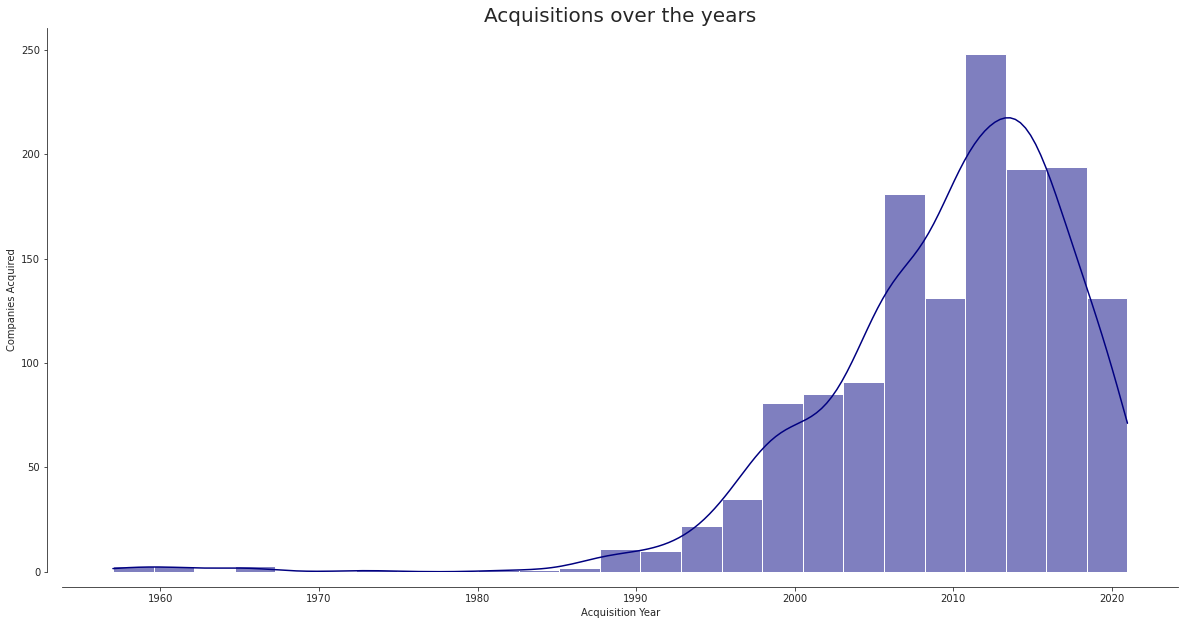

In [13]:
plt.figure(figsize=(20, 10))
sns.set_style("ticks")
plt.title("Acquisitions over the years", fontsize=20)
plt.xlabel("Acquisition Year")
plt.ylabel("Companies Acquired")
sns.histplot(data=data, x="Acquisition Year", kde=True, bins=25, color="navy")
sns.despine(offset=15, trim=False)

In [14]:
data[data["Acquisition Month"]=='Sep']

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
6,7,Apple,1997.0,Sep,Power Computing Corporation,Macintosh clones,NaN,110000000.0,NaN
34,35,Apple,2010.0,Sep,Polar Rose,Facial recognition,NaN,29000000.0,NaN
35,36,Apple,2010.0,Sep,IMSense,High-dynamic-range (HDR) photography,NaN,NaN,NaN
41,42,Apple,2012.0,Sep,Particle,HTML5 Web app firm,NaN,NaN,NaN
64,65,Apple,2014.0,Sep,Prss,Digital magazine,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1403,1404,Citrix,1997.0,Sep,DataPac Australasia,Server-based computing,Australia,NaN,Citrix WinFrame
1420,1421,Citrix,2007.0,Sep,QuickTree,XML security,United States,NaN,"NetScaler application-acceleration platform, W..."
1439,1440,Citrix,2012.0,Sep,Beetil,Cloud-based service desk technology provider,New Zealand,NaN,GoToAssist
1441,1442,Citrix,2013.0,Sep,Byte Squared,iPad document editing,NaN,NaN,ShareFile


<AxesSubplot:title={'center':'Do Companies Prefer A particular month? '}, xlabel='Acquisition Month', ylabel='Companies Acquired'>

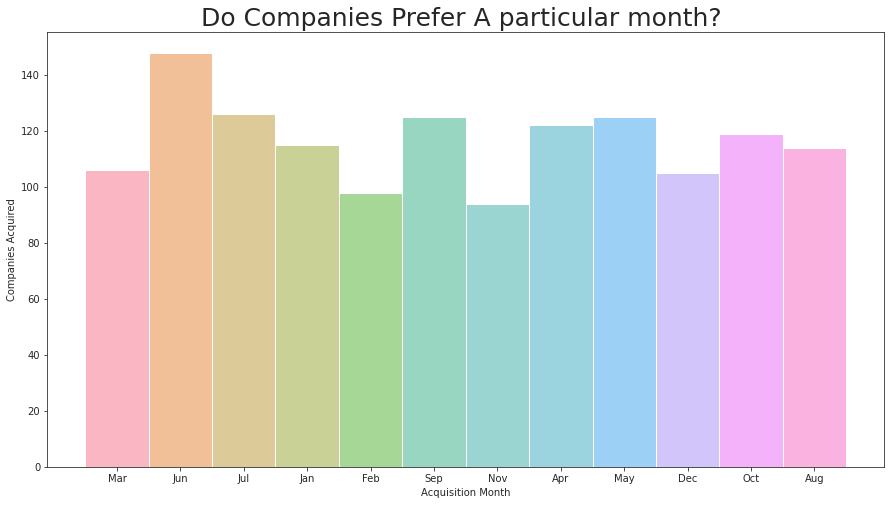

In [15]:
plt.figure(figsize=(15, 8))
plt.title("Do Companies Prefer A particular month? ", fontsize=25)
plt.xlabel("Acquisition Month")
plt.ylabel("Companies Acquired")
sns.histplot(data = data, x = "Acquisition Month", hue = "Acquisition Month", legend = False)

In [16]:
data

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015.0,Apr,Grasshopper,Telephone services,United States,NaN,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016.0,Sep,Norskale,UEM and application performance optimization,France,NaN,"XenApp, XenDesktop"
1452,1453,Citrix,2017.0,Jan,Unidesk,NaN,United States,NaN,"XenApp, XenDesktop"
1453,1454,Citrix,2018.0,Feb,Cedexis,Intelligent traffic management,France,NaN,Citrix ITM


In [17]:
companies = data["Parent Company"].value_counts().reset_index()
companies = companies.rename({"index": "Company", "Parent Company": "Acquired Companies"}, axis=1)
companies

,Company,Acquired Companies
0,Microsoft,258
1,Google,244
2,Ibm,182
3,Hp,129
4,Apple,123
5,Amazon,108
6,Facebook,93
7,Twitter,65
8,Ebay,63
9,Adobe,52


<AxesSubplot:title={'center':'Most Companies Acquired'}, xlabel='Company', ylabel='Acquired Companies'>

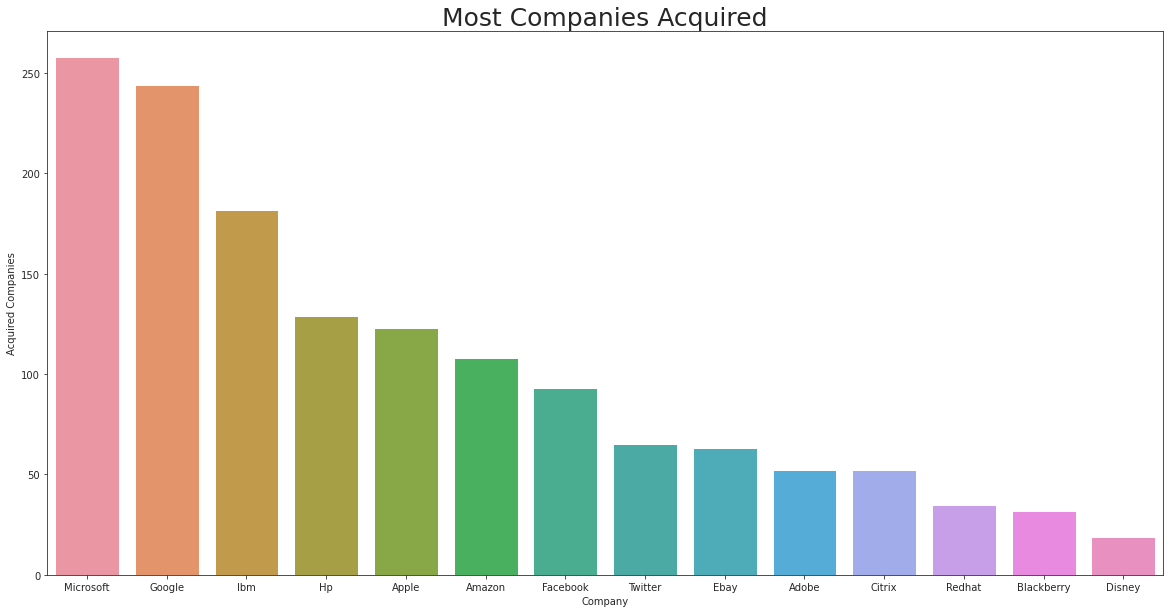

In [18]:
plt.figure(figsize=(20, 10))
plt.title("Most Companies Acquired", fontsize=25)
plt.xlabel("Acquisition Year")
plt.ylabel("Companies Acquired")
sns.barplot(data=companies, x="Company", y="Acquired Companies")

In [19]:
data["Business"].value_counts()

Software                  52
Computer software         37
Video games               18
Information technology    15
Internet software         12
                          ..
Ads and Design             1
Timely App for Android     1
Internet Security          1
Anti-click fraud           1
Project management         1
Name: Business, Length: 864, dtype: int64

In [20]:
business_types = data["Business"].value_counts().reset_index()
business_types = business_types.rename({"index": "Business", "Business": "Number of Companies"}, axis=1)
business_types.head(25)

,Business,Number of Companies
0,Software,52
1,Computer software,37
2,Video games,18
3,Information technology,15
4,Internet software,12
5,Classified advertising,8
6,Information technology consulting,7
7,Electronic commerce,7
8,Online auction,6
9,Artificial intelligence,6


<AxesSubplot:title={'center':'Most Common Types of Businesses Acquired'}, xlabel='Number of Companies', ylabel='Business'>

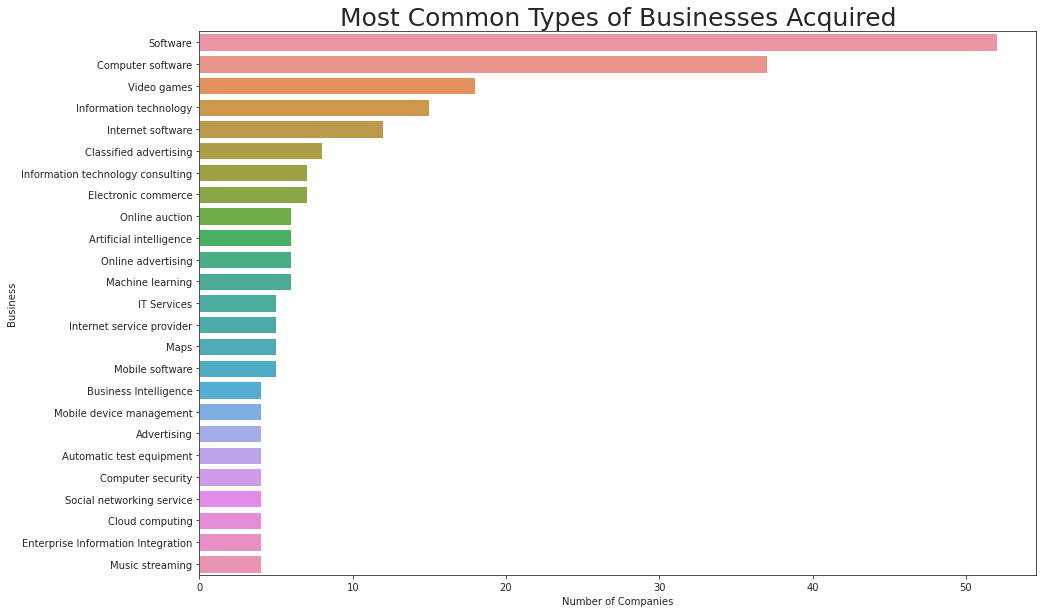

In [21]:
plt.figure(figsize=(15, 10))
plt.title("Most Common Types of Businesses Acquired", fontsize=25)
plt.xlabel("No. of Companies")
plt.ylabel("Type of Business")
sns.barplot(data=business_types.head(25), x="Number of Companies", y="Business")

In [22]:
country = data["Country"].value_counts().reset_index()
country = country.rename({"index": "Country", "Country": "Number of Companies"}, axis=1)
country.head(25)

,Country,Number of Companies
0,United States,248
1,United Kingdom,17
2,Canada,14
3,Ireland,9
4,Germany,7
5,Israel,6
6,France,5
7,Australia,5
8,India,4
9,Sweden,2


Text(0.5, 0, 'No. of Companies')

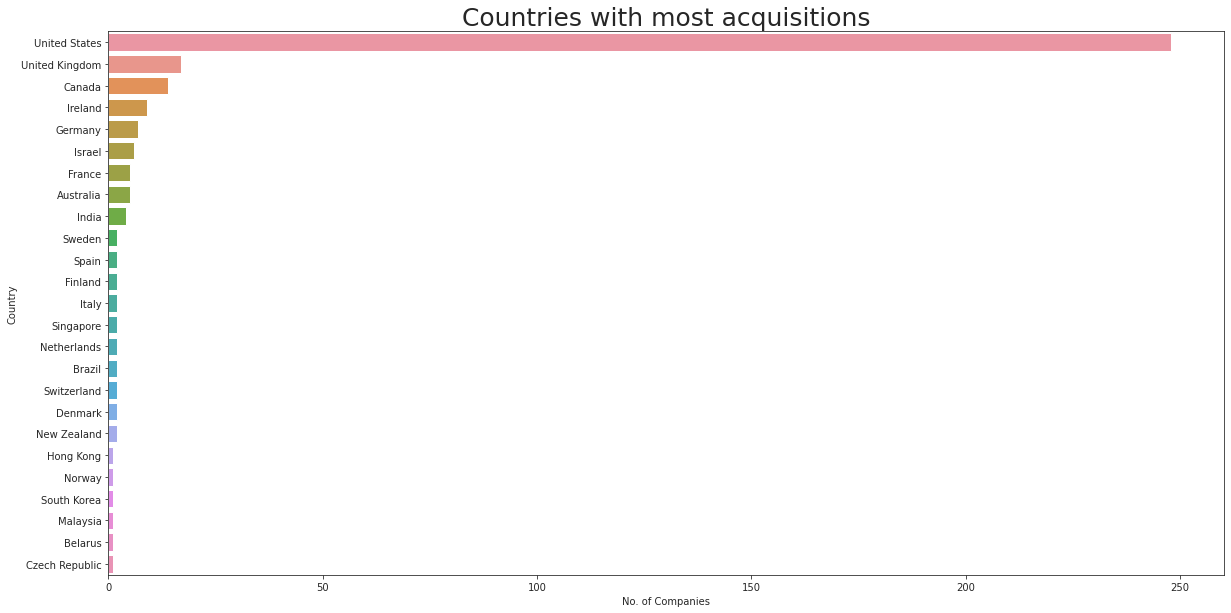

In [23]:
plt.figure(figsize=(20, 10))
plt.title("Countries with most acquisitions", fontsize=25)
sns.barplot(data=country, y="Country", x="Number of Companies")
plt.xlabel("No. of Companies")

In [24]:
# We can see that the US has disproportionately huge number of acquisitions, so removing the US

In [25]:
country_noUS = country.drop(0)
country_noUS.reset_index(inplace = True)
country_noUS

,index,Country,Number of Companies
0,1,United Kingdom,17
1,2,Canada,14
2,3,Ireland,9
3,4,Germany,7
4,5,Israel,6
5,6,France,5
6,7,Australia,5
7,8,India,4
8,9,Sweden,2
9,10,Spain,2


In [26]:
country_noUS.drop(columns = ['index'], inplace = True)
country_noUS

,Country,Number of Companies
0,United Kingdom,17
1,Canada,14
2,Ireland,9
3,Germany,7
4,Israel,6
5,France,5
6,Australia,5
7,India,4
8,Sweden,2
9,Spain,2


Text(0.5, 0, 'No. of Companies')

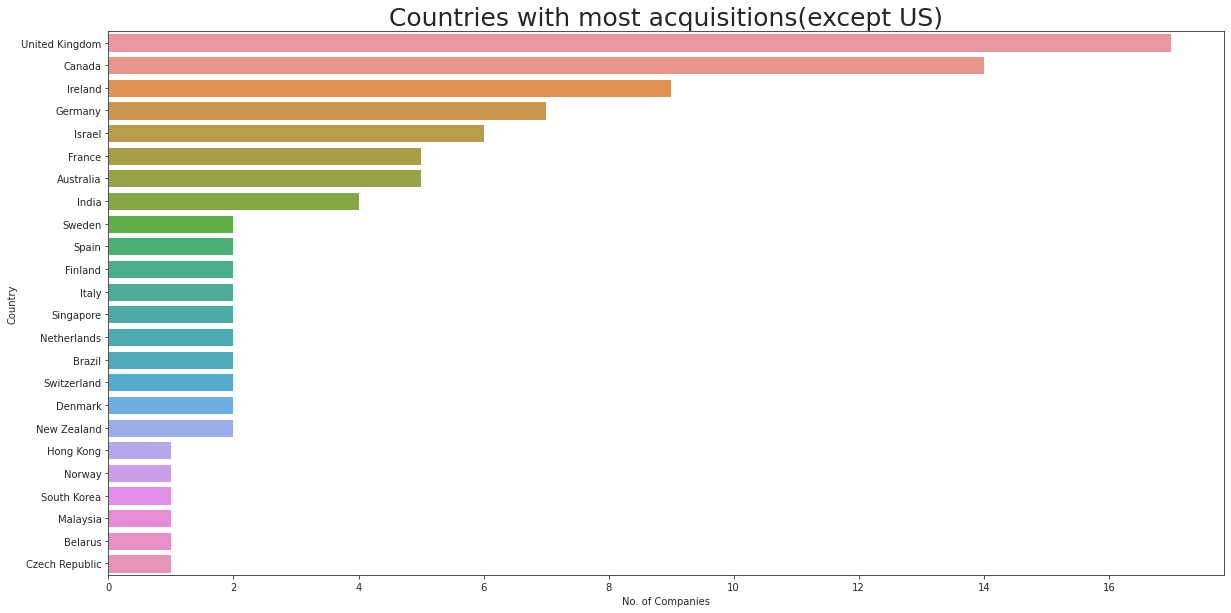

In [27]:
plt.figure(figsize=(20, 10))
plt.title("Countries with most acquisitions(except US)", fontsize=25)
sns.barplot(data=country_noUS, y="Country", x="Number of Companies")
plt.xlabel("No. of Companies")

In [28]:
most_expensive = data.sort_values("Acquisition Price", ascending=False).head(10)
most_expensive

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
1402,1403,Disney,2019.0,Mar,21st Century Fox,NaN,NaN,7.130000e+10,NaN
168,169,Twitter,2015.0,Mar,Periscope,Live-video streaming,NaN,5.010000e+10,NaN
1190,1191,Ibm,2019.0,Jul,Red Hat,Provider of open source software and solutions,United States,3.400000e+10,NaN
872,873,Microsoft,2016.0,Dec,LinkedIn,Professional social network,NaN,2.620000e+10,NaN
350,351,Hp,2002.0,May,Compaq,Personal computer,NaN,2.500000e+10,NaN
917,918,Microsoft,2021.0,Apr,Nuance Communications,Speech synthesis and speech recognition,NaN,1.970000e+10,NaN
1303,1304,Facebook,2014.0,Feb,WhatsApp,NaN,United States,1.900000e+10,NaN
1390,1391,Disney,1996.0,Feb,Capital Cities/ABC Inc.,NaN,NaN,1.900000e+10,NaN
396,397,Hp,2008.0,Aug,Electronic Data Systems,Information technology consulting,NaN,1.390000e+10,NaN
267,268,Amazon,2017.0,Jun,Whole Foods Market,NaN,NaN,1.370000e+10,Whole Foods Market


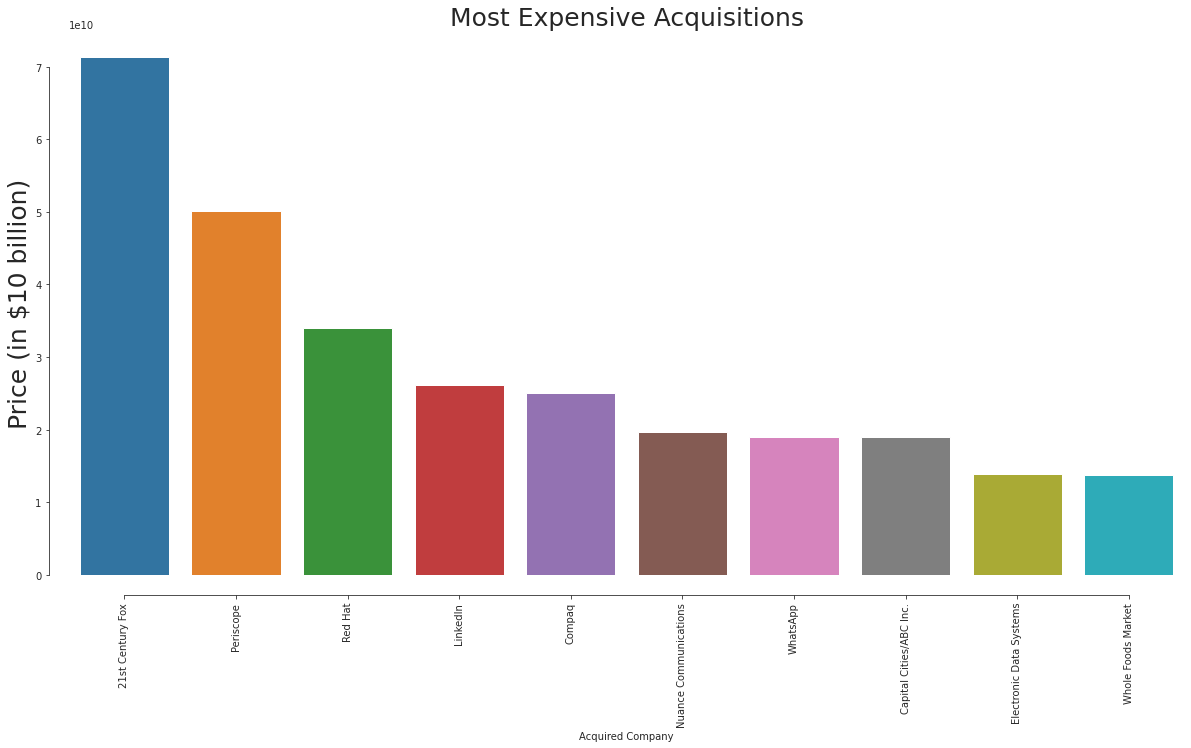

In [29]:
plt.figure(figsize=(20, 10))
plt.title("Most Expensive Acquisitions", fontsize=25)
ax = sns.barplot(data=most_expensive, x="Acquired Company", y="Acquisition Price")
plt.ylabel("Price (in $10 billion)", fontsize=25)
ax.tick_params(axis="x", rotation=90)
sns.despine(offset=20, trim=True)

<font size = "6.5">Applying different models</font>

In [30]:
data.head(5)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Derived Products
0,1,Apple,1988.0,Mar,Network Innovations,Software,NaN,NaN,NaN
1,2,Apple,1988.0,Jun,Orion Network Systems,Computer Software,NaN,NaN,NaN
2,3,Apple,1988.0,Jun,Styleware,Computer software,NaN,NaN,NaN
3,4,Apple,1988.0,Jul,Nashoba Systems,Computer software,NaN,NaN,NaN
4,5,Apple,1989.0,Jan,Coral Software,Computer software,NaN,NaN,NaN


In [31]:
data.isnull().sum()

ID                      0
Parent Company          0
Acquisition Year       28
Acquisition Month      58
Acquired Company        0
Business              274
Country              1114
Acquisition Price    1072
Derived Products     1052
dtype: int64

In [32]:
data_1 = data

In [33]:
data_1.drop(columns = ['ID', 'Country', 'Derived Products'], inplace = True)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = data_1['Parent Company'].values
data_1['Parent Company'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

X = data_1['Acquisition Month'].values
data_1['Acquisition Month'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

X = data_1['Acquired Company'].values
data_1['Acquired Company'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

X = data_1['Business'].values
data_1['Business'] = encoder.fit_transform(X)
X = X.reshape(-1,1)

data_1

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Acquisition Price
0,2,1988.0,7,790,723,NaN
1,2,1988.0,6,847,173,NaN
2,2,1988.0,6,1160,183,NaN
3,2,1988.0,5,768,183,NaN
4,2,1989.0,4,290,183,NaN
...,...,...,...,...,...,...
1450,4,2015.0,0,519,769,NaN
1451,4,2016.0,11,811,782,NaN
1452,4,2017.0,4,1281,864,NaN
1453,4,2018.0,3,232,392,NaN


In [35]:
from sklearn.impute import SimpleImputer
missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
X=data_1['Acquisition Year'].values
X=X.reshape(-1,1)
data_1['Acquisition Year'] = missingvalueimputer.fit_transform(X)

missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
X=data_1['Acquisition Month'].values
X=X.reshape(-1,1)
data_1['Acquisition Month'] = missingvalueimputer.fit_transform(X)

missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
X=data_1['Business'].values
X=X.reshape(-1,1)
data_1['Business'] = missingvalueimputer.fit_transform(X)

missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
X=data_1['Acquisition Price'].values
X=X.reshape(-1,1)
data_1['Acquisition Price'] = missingvalueimputer.fit_transform(X)

data_1

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Acquisition Price
0,2,1988.0,7.0,790,723,1.357384e+09
1,2,1988.0,6.0,847,173,1.357384e+09
2,2,1988.0,6.0,1160,183,1.357384e+09
3,2,1988.0,5.0,768,183,1.357384e+09
4,2,1989.0,4.0,290,183,1.357384e+09
...,...,...,...,...,...,...
1450,4,2015.0,0.0,519,769,1.357384e+09
1451,4,2016.0,11.0,811,782,1.357384e+09
1452,4,2017.0,4.0,1281,864,1.357384e+09
1453,4,2018.0,3.0,232,392,1.357384e+09


In [36]:
x = data_1[['Parent Company', 'Acquisition Year', 'Acquisition Month', 'Acquired Company', 'Business']]
y = data_1[['Acquisition Price']]

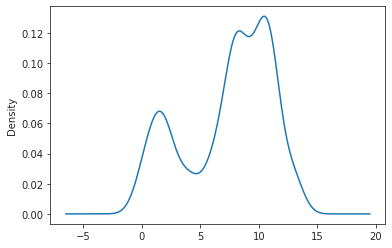

In [37]:
normal = x['Parent Company']
ax = normal.plot.kde()

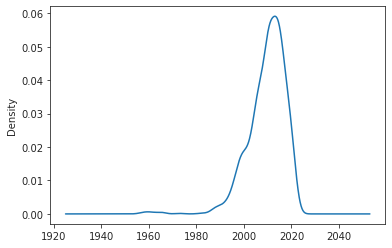

In [38]:
normal = x['Acquisition Year']
ax = normal.plot.kde()

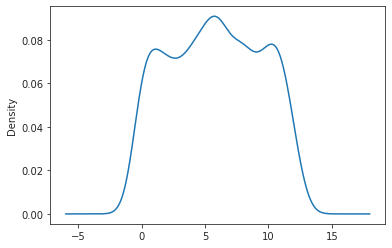

In [39]:
normal = x['Acquisition Month']
ax = normal.plot.kde()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [42]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_prediction =  regressor.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,y_prediction)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,y_prediction))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test,y_prediction)))

R2 score is -0.002256802758541232
Mean square error:  1.818326952203467e+19
Root mean square error:  4264184508.441757


In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train, Y_train)
pred_DT = tree_regressor.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,pred_DT)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,pred_DT))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test, pred_DT)))

R2 score is -0.043562500588164355
Mean square error:  1.893265095238721e+19
Root mean square error:  4351166619.699504


In [46]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor.fit(X_train, Y_train.values.ravel())
forest_pred = forest_regressor.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,forest_pred)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,forest_pred))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test,forest_pred)))

R2 score is -0.03459006928608921
Mean square error:  1.8769870179850134e+19
Root mean square error:  4332420822.109752


In [48]:
#LASSO Regression
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, Y_train.values.ravel())
lasso_pred = lasso.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,lasso_pred)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,lasso_pred))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test,lasso_pred)))

R2 score is -0.0023267659131775975
Mean square error:  1.8184538816385042e+19
Root mean square error:  4264333337.860098


In [50]:
#Ridge regression
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,ridge_pred)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,ridge_pred))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test,ridge_pred)))

R2 score is -0.002257337931078629
Mean square error:  1.818327923130924e+19
Root mean square error:  4264185646.909529


In [52]:
#ElasticNet regression
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV()
elasticNet.fit(X_train, Y_train.values.ravel())
elasticNet_pred = elasticNet.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(Y_test,elasticNet_pred)
print("R2 score is" ,score)
print("Mean square error: ",mean_squared_error(Y_test,elasticNet_pred))
print("Root mean square error: ",np.sqrt(mean_squared_error(Y_test,elasticNet_pred)))

R2 score is -0.006039685588062893
Mean square error:  1.8251899815059522e+19
Root mean square error:  4272224223.4062953
